In [1]:
import pandas as pd

In [2]:
footfall=pd.read_csv(r"C:\Users\aksha\Downloads\footfalls.csv")

<Axes: >

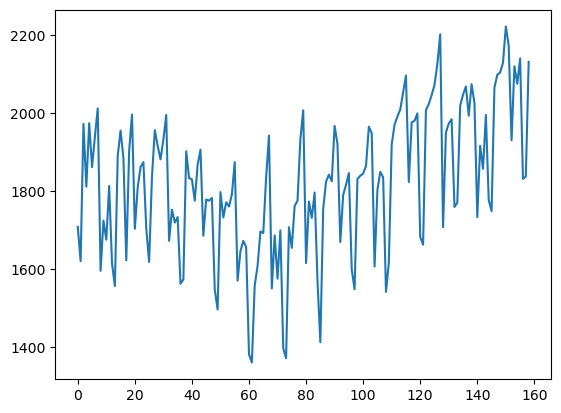

In [3]:
footfall['Footfalls'].plot()

In [4]:
footfall

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


In [5]:
# here t is used to create linear models y=b0+b1(x) here x is t , t is considered as a feature 

In [6]:
# log_footfalls is used to create exponential model log(y)=B0+b1x

In [7]:
# t square is used to create quadratic model
# dummy variables are used to create addictive and multiplicative models

In [8]:
footfall['date']=pd.to_datetime(footfall['Month'],format='%b-%y')

In [9]:
footfall['month']=footfall.date.dt.strftime('%b')
footfall['year']=footfall.date.dt.strftime('%y')

''' footfall['day']=footfall.month.dt.day
footfall['wkday']=footfall.month.dt.strftime('%a') '''

" footfall['day']=footfall.month.dt.day\nfootfall['wkday']=footfall.month.dt.strftime('%a') "

In [10]:
footfall

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan,91
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb,91
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar,91
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr,91
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,Nov,03
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,Dec,03
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,Jan,04
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01,Feb,04


In [11]:
pvt=pd.pivot_table(index='year',columns='month',values='Footfalls',data=footfall,fill_value=0)

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt

<Axes: xlabel='month', ylabel='year'>

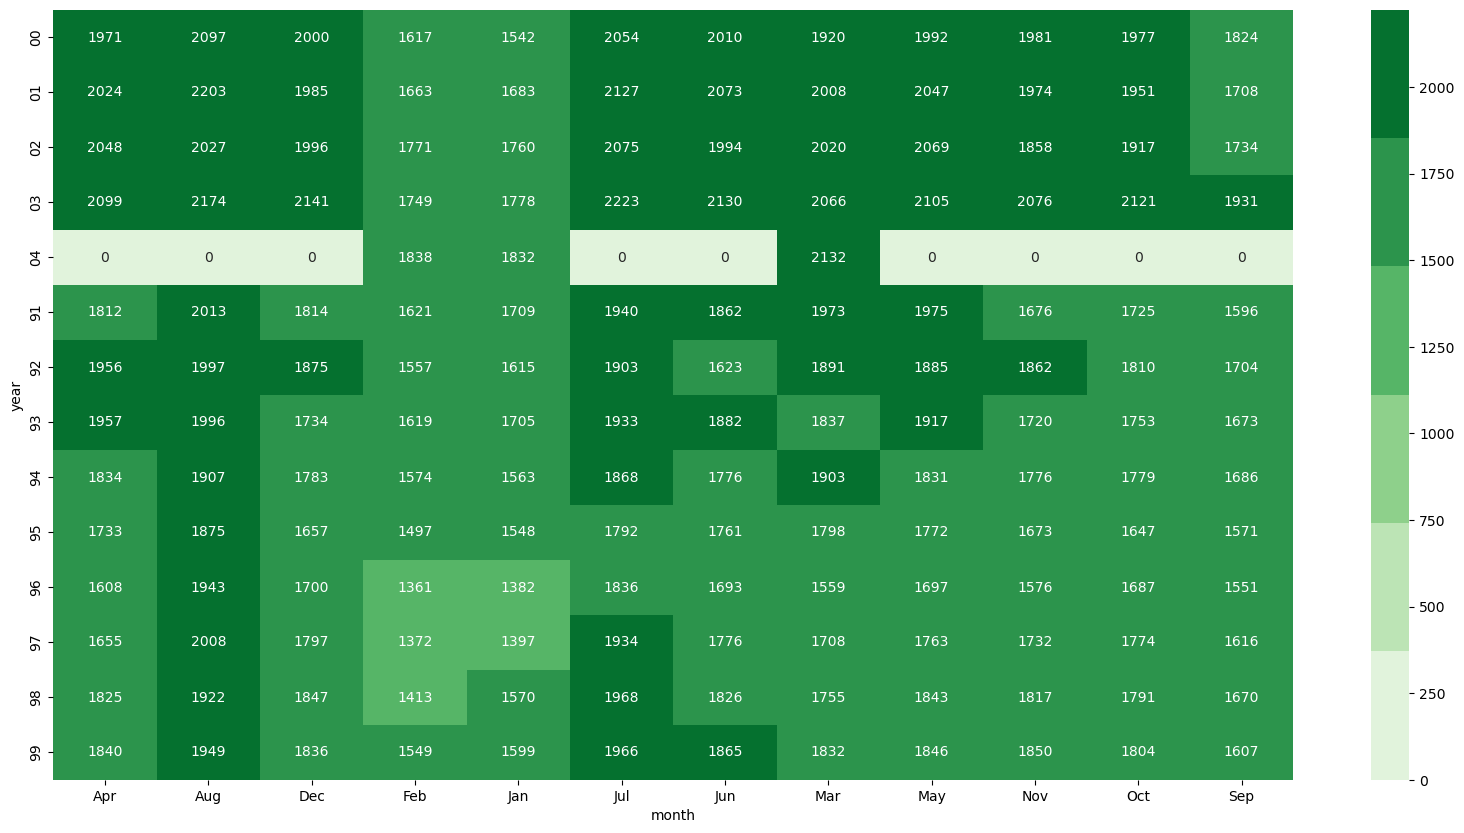

In [13]:
plt.figure(figsize=(20,10))
colormap = sns.color_palette("Greens")
sns.heatmap(pvt,annot=True,fmt='g',cmap=colormap)

<Axes: xlabel='month', ylabel='Footfalls'>

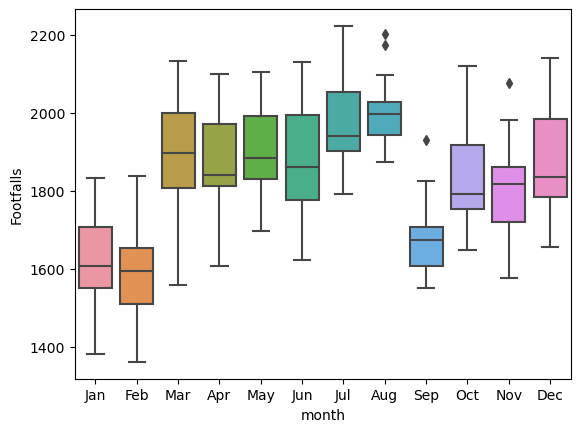

In [14]:
sns.boxplot(x='month',y='Footfalls',data=footfall)

<Axes: xlabel='year', ylabel='Footfalls'>

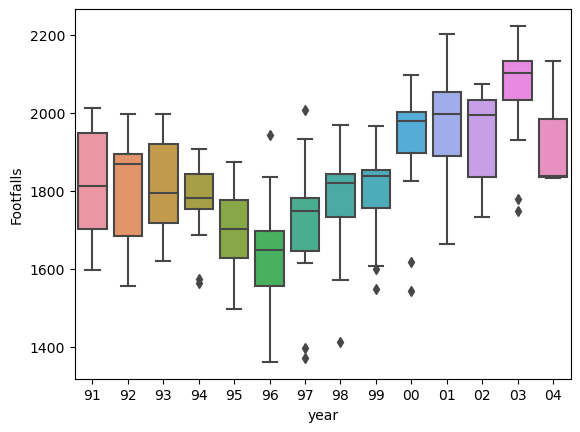

In [15]:
sns.boxplot(x='year',y='Footfalls',data=footfall)

In [16]:
from statsmodels.tsa.seasonal import STL

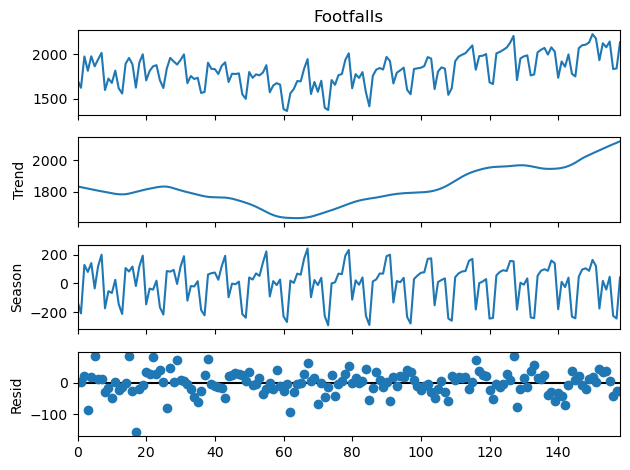

In [17]:
decomp=STL(footfall['Footfalls'],period=12).fit()
decomp.plot()
plt.show()

In [18]:
import numpy as np

In [19]:
train=footfall.head(147)
test=footfall.tail(12)

In [20]:
# linear model
import statsmodels.formula.api as smf

linear=smf.ols('Footfalls~t',data=train).fit()
prdt_linear=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test['Footfalls'])-np.array(prdt_linear))**2))


In [21]:
rmse_linear

209.92559265462643

In [22]:
# exponential model

exp=smf.ols('log_footfalls~t',data=train).fit()
prdt_e=pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_e=np.sqrt(np.mean((np.array(test['Footfalls'])-np.array(np.exp(prdt_e)))**2))

In [23]:
rmse_e

217.05263569548433

In [24]:
# quadratic model

qud=smf.ols('Footfalls~t+t_square',data=train).fit()
prdt_q=pd.Series(qud.predict(pd.DataFrame(test[['t','t_square']])))
rmse_q=np.sqrt(np.mean((np.array(test['Footfalls'])-np.array((prdt_q)))**2))

In [25]:
rmse_q

137.154627413561

In [26]:
footfall.columns

Index(['Month', 'Footfalls', 't', 'log_footfalls', 't_square', 'Jan', 'Feb',
       'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'date', 'month', 'year'],
      dtype='object')

In [27]:
# addictive seasonality

add_sea=smf.ols('Footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
prdt_a=pd.Series(add_sea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse_a=np.sqrt(np.mean((np.array(test['Footfalls'])-np.array((prdt_a)))**2))

In [28]:
rmse_a

264.6643900568771

In [29]:
# addictive seasonality Quadratic

qadd_sea=smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
prdt_qa=pd.Series(qadd_sea.predict(pd.DataFrame(test[['t_square','t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse_qa=np.sqrt(np.mean((np.array(test['Footfalls'])-np.array((prdt_qa)))**2))

In [30]:
rmse_qa

50.60724584142223

In [31]:
# multiplicative seasonality

mul_sea=smf.ols('log_footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
prdt_m=pd.Series(mul_sea.predict(test))
rmse_m=np.sqrt(np.mean((np.array(test['Footfalls'])-np.array(np.exp(prdt_m)))**2))

In [32]:
rmse_m

268.1970325266245

In [33]:
## multiplicative seasonality Additive

amul_sea=smf.ols('log_footfalls~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
prdt_am=pd.Series(amul_sea.predict(test))
rmse_am=np.sqrt(np.mean((np.array(test['Footfalls'])-np.array(np.exp(prdt_am)))**2))

In [34]:
rmse_am

172.7672678748759

In [35]:
results=pd.DataFrame({'model':['linear','exp','add','add+quad','quad','mul','mul+add'],"RMSE":[rmse_linear,rmse_e,rmse_a,rmse_qa,rmse_q,rmse_m,rmse_am]})

In [36]:
results

,model,RMSE
0,linear,209.925593
1,exp,217.052636
2,add,264.664390
3,add+quad,50.607246
4,quad,137.154627
5,mul,268.197033
6,mul+add,172.767268


### The best model is ADD+QUAD

In [37]:
final=smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=footfall).fit()